<h1>Time Series Analysis for Stock Prices</h1>
<hr>

<h2>Objective:</h2> 

<h3>Analyze historical stock price data to identify patterns and trends.</h3>

<h2>Tasks:</h2>
<p>

1. Retrieve stock price data using APIs (e.g., Alpha Vantage, Yahoo Finance).
    
2. Perform time series analysis and visualization.
    
3. Explore correlations with external factors (e.g., economic indicators).
    
4. Build a simple predictive model for stock prices.</p>

<h3>Step 1: Install Required Packages</h3>

In [ ]:
pip install alpha_vantage pandas matplotlib

<h3>Step 2: Retrieve Stock Price Data</h3>

In [2]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

# add your API key from AlphaVantage: https://www.alphavantage.co/support/#api-key

api_key = '4R0H8YMMKPVW6TPC'
symbol = 'META'  # Replace with the stock symbol you want to analyze

# Initialize Alpha Vantage API
ts = TimeSeries(key=api_key, output_format='pandas')

# Retrieve historical stock price data
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

# Extract relevant information
stock_data = data['4. close']

# Print the first few rows of the data
print(stock_data.head())

date
2024-01-10    370.47
2024-01-09    357.43
2024-01-08    358.66
2024-01-05    351.95
2024-01-04    347.12
Name: 4. close, dtype: float64


<h3>Step 3: Perform Time Series Analysis and Visualization</h3>

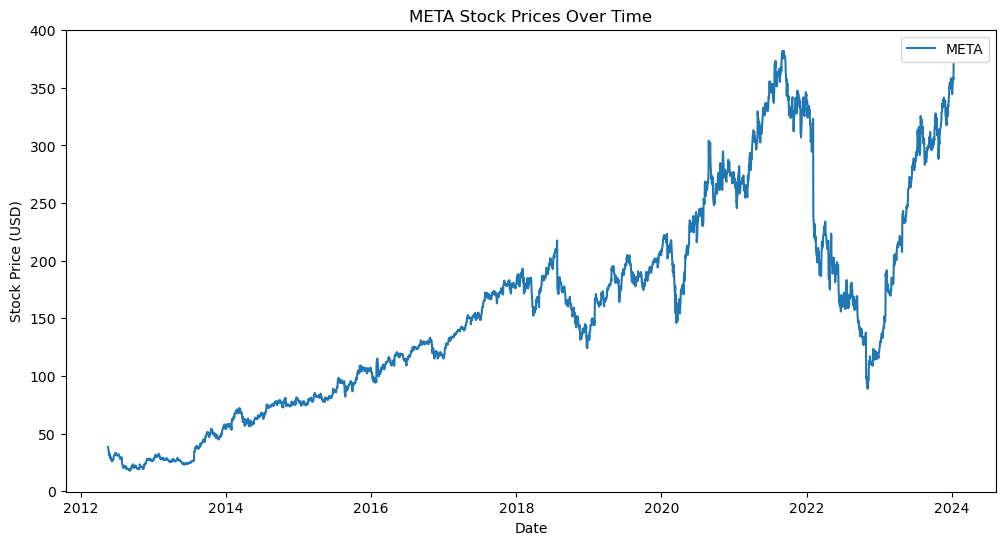

In [3]:
# Convert index to datetime
stock_data.index = pd.to_datetime(stock_data.index)

# Plot stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data.values, label=symbol)
plt.title(f'{symbol} Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

<h3>Step 4: Explore Correlations with External Factors</h3>

Correlation between META stock prices and GDP growth: 0.30


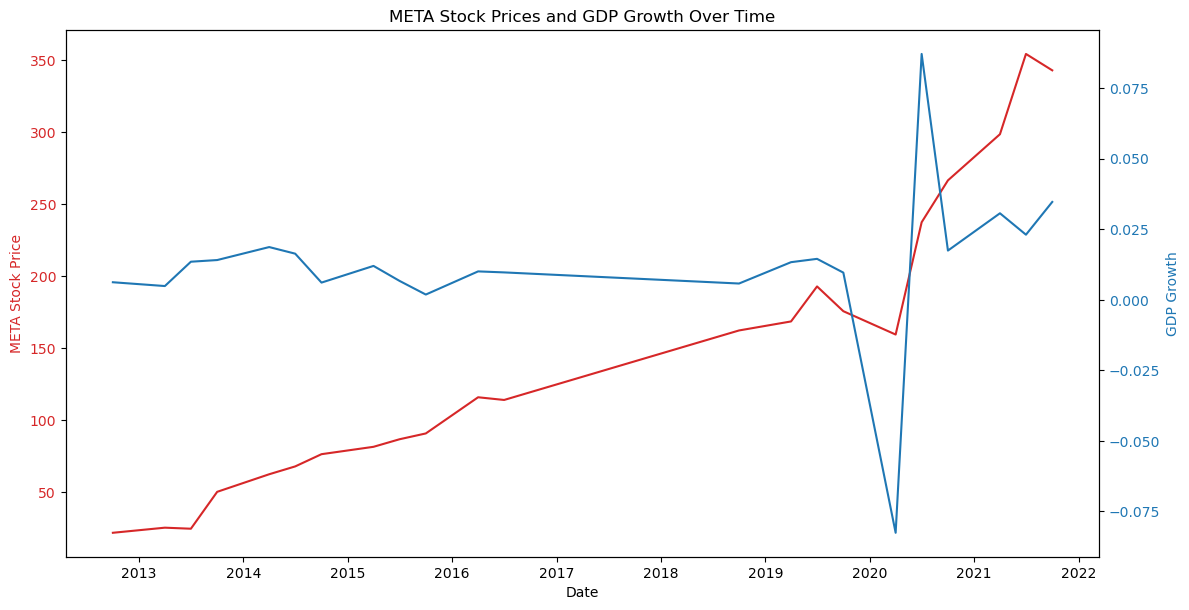

In [6]:
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Replace 'YOUR_API_KEY' with your Alpha Vantage API key
api_key = '4R0H8YMMKPVW6TPC'
symbol = 'META'  # Replace with the stock symbol you want to analyze

# Initialize Alpha Vantage API
ts = yf.Ticker(symbol)

# Retrieve historical stock price data
stock_data = ts.history(period='max')
stock_data.index = stock_data.index.tz_localize(None)  # Make timezone-naive

# Retrieve GDP growth data using FRED API
gdp_data = pdr.get_data_fred('GDP', start='2000-01-01', end='2022-01-01')
gdp_data = gdp_data.pct_change().dropna()  # Calculate percentage change
gdp_data.index = gdp_data.index.tz_localize(None)  # Make timezone-naive

# Merge stock prices and GDP growth data
merged_data = pd.merge(stock_data['Close'], gdp_data, left_index=True, right_index=True, how='inner')

# Calculate correlation between stock prices and GDP growth
correlation = merged_data['Close'].corr(merged_data['GDP'])
print(f'Correlation between {symbol} stock prices and GDP growth: {correlation:.2f}')

# Plot stock prices and GDP growth
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel(f'{symbol} Stock Price', color=color)
ax1.plot(merged_data.index, merged_data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('GDP Growth', color=color)
ax2.plot(merged_data.index, merged_data['GDP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title(f'{symbol} Stock Prices and GDP Growth Over Time')
plt.show()


<h3>Step 5: Build a Simple Predictive Model</h3>

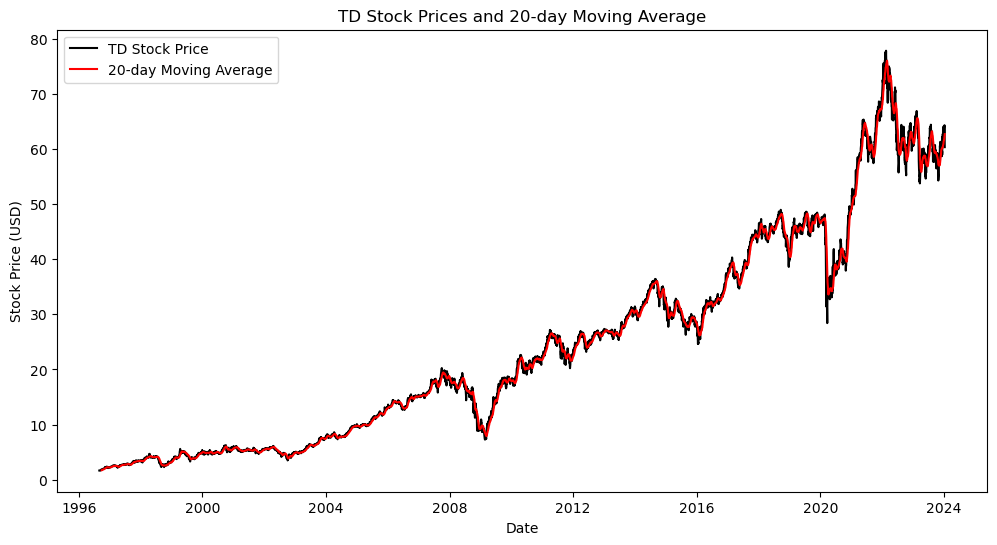

In [5]:
# Calculate the 20-day moving average
stock_data['20_MA'] = stock_data['Close'].rolling(window=20).mean()

# Plot stock prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{symbol} Stock Price', color='black')
plt.plot(stock_data.index, stock_data['20_MA'], label='20-day Moving Average', color='red')
plt.title(f'{symbol} Stock Prices and 20-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()